In [1]:
# Task 1 : Build a Simple Linear Regression Model
# Task: Implement a basic linear regression model.
# Details:
# Use a dataset with one feature and one target variable.
# Train the model using a library like scikit-learn and make predictions.
 

In [1]:
#libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.isnull().sum() # Check for any null (missing) values in the DataFrame and count them

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [54]:
df.describe() # Summary

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [7]:
df = df[['TV', 'Sales']] # Extracting the 'TV' and 'Sales' columns from the DataFrame

In [9]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [11]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [17]:
X=df[["TV"]]    #feature
y=df[["Sales"]] #target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #spliting


In [21]:
# Initialize the model
model = LinearRegression()

In [23]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error between actual and predicted values
r2 = r2_score(y_test, y_pred)            # Calculate the R-squared score to assess model performance

In [29]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10.204654118800956
R-squared: 0.6766954295627077


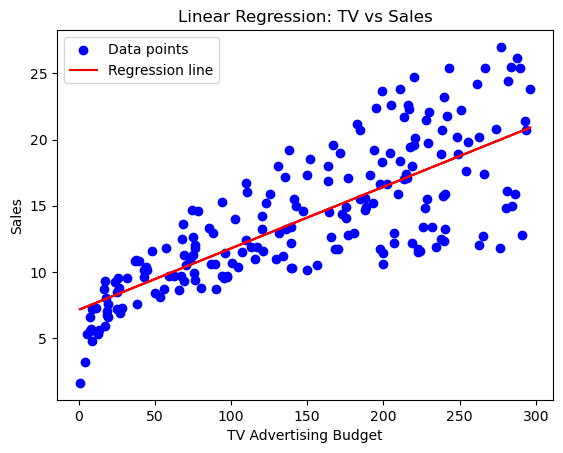

In [31]:
# Plot the regression line with training data
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs Sales')
plt.legend()
plt.show()

In [33]:
y_pred = model.predict(X_test)     # Make predictions using the trained model on the test data (X_test)

In [61]:
# Allow user to input a new TV advertising budget
tv_budget_input = input("Enter the TV advertising budget (in thousands, e.g., 30000 or 30): ")

# Remove any commas or dollar signs
tv_budget_cleaned = tv_budget_input.replace("$", "").replace(",", "")

try:
    # Convert the cleaned input to a float
    tv_budget = float(tv_budget_cleaned)

    # Reshape the input to match the model's expected input format
    tv_budget_reshaped = np.array([[tv_budget]])

    # Predict sales based on the entered TV budget
    predicted_sales = model.predict(tv_budget_reshaped)

    # Convert predicted_sales to a float and round it
    print("Predicted sales for a TV advertising budget of $", tv_budget, "K is:", round(float(predicted_sales[0]), 2))

except ValueError:
    print("Invalid input! Please enter a numeric value for the TV advertising budget.")



Enter the TV advertising budget (in thousands, e.g., 30000 or 30):  210


Predicted sales for a TV advertising budget of $ 210.0 K is: 16.89


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22496\1342498288.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted sales for a TV advertising budget of $", tv_budget, "K is:", round(float(predicted_sales[0]), 2))
